In [407]:
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import time
from config import api_key
import pprint as pp
from collections import Counter
import seaborn as sns
%matplotlib inline

In [ ]:
#Function Snip For Future Use
#_2010_2020_ = dfx.loc[(dfx['release_date'] > '2010-01-01') & (dfx['release_date'] < '2020-01-01'), ['title', 'release_date', 'revenue', 'budget']]


In [335]:
###Import dfx.csv file created earlier in Notebook
dfx = pd.read_csv('dfx_movies.csv')
dfx.head()
dfx.shape

,Unnamed: 0,id,imdb_id,title,release_date,genres,revenue,budget,runtime,tagline,overview,production_companies,production_countries,vote_average,vote_count,all_companies
0,0,19995,tt0499549,Avatar,2009-12-10,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2787965087,237000000,162,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{'id': 289, 'logo_path': None, 'name': 'Ingen...","[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,18071,"['Ingenious Film Partners', 'Dune Entertainmen..."
1,1,140607,tt2488496,Star Wars: The Force Awakens,2015-12-15,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2068223624,245000000,136,Every generation has a story.,Thirty years after defeating the Galactic Empi...,"[{'id': 1634, 'logo_path': None, 'name': 'True...","[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,12283,"['Truenorth Productions', 'Lucasfilm', 'Bad Ro..."
2,2,299536,tt4154756,Avengers: Infinity War,2018-04-25,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2046239637,300000000,149,An entire universe. Once and for all.,As the Avengers and their allies have continue...,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",8.3,12316,['Marvel Studios']
3,3,597,tt0120338,Titanic,1997-11-18,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",1845034188,200000000,194,Nothing on Earth could come between them.,101-year-old Rose DeWitt Bukater tells the sto...,"[{'id': 4, 'logo_path': '/fycMZt242LVjagMByZOL...","[{'iso_3166_1': 'US', 'name': 'United States o...",7.8,13645,"['Paramount', 'Lightstorm Entertainment', '20t..."
4,4,135397,tt0369610,Jurassic World,2015-06-06,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1671713208,150000000,124,The park is open.,Twenty-two years after the events of Jurassic ...,"[{'id': 3341, 'logo_path': '/dTG5dXE1kU2mpmL9B...","[{'iso_3166_1': 'US', 'name': 'United States o...",6.6,13645,"['Fuji Television Network', 'Amblin Entertainm..."


(4000, 16)

In [336]:
#Drop Additonal Unnecessary Columns
dfx.drop(columns=['Unnamed: 0', 'production_companies', 'genres'])

,id,imdb_id,title,release_date,revenue,budget,runtime,tagline,overview,production_countries,vote_average,vote_count,all_companies
0,19995,tt0499549,Avatar,2009-12-10,2787965087,237000000,162,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,18071,"['Ingenious Film Partners', 'Dune Entertainmen..."
1,140607,tt2488496,Star Wars: The Force Awakens,2015-12-15,2068223624,245000000,136,Every generation has a story.,Thirty years after defeating the Galactic Empi...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,12283,"['Truenorth Productions', 'Lucasfilm', 'Bad Ro..."
2,299536,tt4154756,Avengers: Infinity War,2018-04-25,2046239637,300000000,149,An entire universe. Once and for all.,As the Avengers and their allies have continue...,"[{'iso_3166_1': 'US', 'name': 'United States o...",8.3,12316,['Marvel Studios']
3,597,tt0120338,Titanic,1997-11-18,1845034188,200000000,194,Nothing on Earth could come between them.,101-year-old Rose DeWitt Bukater tells the sto...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.8,13645,"['Paramount', 'Lightstorm Entertainment', '20t..."
4,135397,tt0369610,Jurassic World,2015-06-06,1671713208,150000000,124,The park is open.,Twenty-two years after the events of Jurassic ...,"[{'iso_3166_1': 'US', 'name': 'United States o...",6.6,13645,"['Fuji Television Network', 'Amblin Entertainm..."
5,24428,tt0848228,The Avengers,2012-04-25,1519557910,220000000,143,Some assembly required.,When an unexpected enemy emerges and threatens...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.6,18576,['Marvel Studios']
6,168259,tt2820852,Furious 7,2015-04-01,1506249360,190000000,137,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.3,6317,"['Abu Dhabi Film Commission', 'Universal Pictu..."
7,99861,tt2395427,Avengers: Age of Ultron,2015-04-22,1405403694,280000000,141,A New Age Has Come.,When Tony Stark tries to jumpstart a dormant p...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.3,12535,['Marvel Studios']
8,284054,tt1825683,Black Panther,2018-02-13,1346739107,200000000,134,Long live the king.,King T'Challa returns home from America to the...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,11347,"['Marvel Studios', 'Walt Disney Pictures']"
9,12445,tt1201607,Harry Potter and the Deathly Hallows: Part 2,2011-07-07,1342000000,125000000,130,It all ends here.,"Harry, Ron and Hermione continue their quest t...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",8.1,11060,"['Warner Bros. Pictures', 'Heyday Films']"


In [337]:
#Replace '0' Values in Revenue & Budget with nan
dfx_cols = ['revenue', 'budget']
dfx[dfx_cols] = dfx[dfx_cols].replace(0, np.nan)

In [338]:
#Drop rows with nan Values in Revenue & Budget
dfx.dropna(subset = dfx_cols, inplace=True)
dfx.shape

(3566, 16)

In [339]:
#Set Revenue & Budget as 
dfx['revenue'] = dfx['revenue'] / 1000000
dfx['budget'] = dfx['budget'] / 1000000

In [340]:
#Clean up Production Cos
dfx['all_companies'] = dfx['all_companies'].str.strip('[]').str.replace(' ','').str.replace("'",'')
dfx['all_companies'] = dfx['all_companies'].str.split(',')

In [341]:
all_cos = []

for row in dfx['all_companies']:
    for co in row:
        all_cos.append(co)

all_cos[:10]

['IngeniousFilmPartners',
 'DuneEntertainment',
 'LightstormEntertainment',
 '20thCenturyFox',
 'TruenorthProductions',
 'Lucasfilm',
 'BadRobot',
 'MarvelStudios',
 'Paramount',
 'LightstormEntertainment']

In [342]:
#Count & Sort Production Companies
prod_appearances = Counter(all_cos)
prod_sorted = sorted(zip(prod_appearances.values(), prod_appearances.keys()), reverse=True)
prod_sorted[:10]

[(335, 'WarnerBros.Pictures'),
 (332, 'UniversalPictures'),
 (261, 'ColumbiaPictures'),
 (234, 'Paramount'),
 (224, '20thCenturyFox'),
 (173, 'NewLineCinema'),
 (136, 'WaltDisneyPictures'),
 (116, 'TouchstonePictures'),
 (113, 'RelativityMedia'),
 (98, 'DreamWorks')]

In [343]:
#Convert Release Dates to datetime and Make Release Year column
dfx.release_date = pd.to_datetime(dfx['release_date'])
dfx['release_year'] = dfx['release_date'].dt.year

In [345]:
#Add Multiple Column (Revenue / Budget)
dfx['multiple'] = dfx['revenue'] / dfx['budget']
dfx.sort_values('multiple', ascending=False).head(10)

,Unnamed: 0,id,imdb_id,title,release_date,genres,revenue,budget,runtime,tagline,overview,production_companies,production_countries,vote_average,vote_count,all_companies,release_year,multiple
3801,3801,78383,tt1913166,Nurse 3-D,2013-09-28,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",10.000000,0.00001,99,Your pain is her pleasure.,"Abby Russell, a beautiful, dedicated nurse wit...","[{'id': 1632, 'logo_path': '/cisLn1YAUuptXVBa0...","[{'iso_3166_1': 'US', 'name': 'United States o...",4.9,172,[Lionsgate],2013,1000000.000000
714,714,23827,tt1179904,Paranormal Activity,2009-09-25,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",193.355800,0.01500,86,What Happens When You Sleep?,"After a young, middle class couple moves into ...","[{'id': 3172, 'logo_path': '/kDedjRZwO8uyFhuHa...","[{'iso_3166_1': 'US', 'name': 'United States o...",5.9,2616,"[BlumhouseProductions, SolanaFilms]",2009,12890.386667
533,533,2667,tt0185937,The Blair Witch Project,1999-07-14,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",248.000000,0.06000,81,The scariest movie of all time is a true story.,In October of 1994 three student filmmakers di...,"[{'id': 15160, 'logo_path': None, 'name': 'Hax...","[{'iso_3166_1': 'US', 'name': 'United States o...",6.3,2079,"[HaxanFilms, ArtisanEntertainment]",1999,4133.333333
2743,2743,9372,tt0390521,Super Size Me,2004-01-17,"[{'id': 99, 'name': 'Documentary'}, {'id': 35,...",28.575078,0.06500,100,The first ever reality-based movie ... everyth...,Morgan Spurlock subjects himself to a diet bas...,"[{'id': 8735, 'logo_path': None, 'name': 'Kath...","[{'iso_3166_1': 'US', 'name': 'United States o...",6.7,821,"[KathburPictures, SamuelGoldwynFilms, TheCon, ...",2004,439.616585
2293,2293,299245,tt2309260,The Gallows,2015-07-10,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",42.664410,0.10000,87,Every School Has Its Spirit,20 years after a horrific accident during a sm...,"[{'id': 69581, 'logo_path': None, 'name': 'Tre...","[{'iso_3166_1': 'US', 'name': 'United States o...",4.8,565,"[TremendumPictures, NewLineCinema, BlumhousePr...",2015,426.644100
2033,2033,83,tt0374102,Open Water,2003-12-29,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",54.667954,0.13000,79,Scream all you want.,Two divers are left out at sea without a boat....,"[{'id': 22376, 'logo_path': None, 'name': 'Plu...","[{'iso_3166_1': 'US', 'name': 'United States o...",5.4,557,[PlungePicturesLLC],2003,420.522723
3059,3059,538831,tt5747714,Unbound,2018-06-15,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",21.000000,0.08000,97,Love will make you do evil things.,"Set in a sleepy town in New Orleans, a family ...","[{'id': 107123, 'logo_path': None, 'name': 'Ra...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,0,[RahamanStudios],2018,262.500000
3070,3070,5723,tt0907657,Once,2007-03-23,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",20.710513,0.16000,85,How often do you find the right person?,A vacuum repairman moonlights as a street musi...,"[{'id': 11571, 'logo_path': None, 'name': 'Sam...","[{'iso_3166_1': 'IE', 'name': 'Ireland'}]",7.5,679,"[SamsonFilms, SummitEntertainment, RTÉ]",2007,129.440706
2215,2215,8193,tt0374900,Napoleon Dynamite,2004-06-11,"[{'id': 35, 'name': 'Comedy'}]",46.118097,0.40000,95,He's out to prove he's got nothing to prove.,A listless and alienated teenager decides to h...,"[{'id': 746, 'logo_path': '/kc7bdIVTBkJYy9aDK1...","[{'iso_3166_1': 'US', 'name': 'United States o...",6.8,885,"[MTVFilms, AccessFilms, NapoleonPicturesLimite...",2004,115.295242
3193,3193,9687,tt0444653,Keeping Mum,2005-12-02,"[{'id': 35, 'name': 'Comedy'}]",18.564702,0.16900,103,Some family secrets are best kept...buried.,A pastor preoccupied with writing the perfect ...,"[{'id': 491, 'logo_path': '/rUp0lLKa1pr4UsPm8f...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",6.6,263,[SummitEntertainment],2005,109.850308


In [346]:
#Drop Karate Kid (Budget Outlier)
dfx.drop(dfx.loc[dfx['id'] == 8856.0].index, inplace=True)
#Drop Star Wars Trilogy
dfx.drop(dfx.loc[dfx['id'] == 570421.0].index, inplace=True)

In [347]:
#Drop Outlier Paranormal Activity
dfx.drop(dfx.loc[dfx['id'] == 23827.0].index, inplace=True)

In [348]:
#Drop Outlier Nurse 3D
dfx.drop(dfx.loc[dfx['id'] == 78383.0].index, inplace=True)

In [349]:
#Function to Filter Out Non-US Production Companies

dfx['production_countries'] = dfx['production_countries'].str.strip('[]').str.replace(' ','').str.replace("'",'')
dfx['production_countries'] = dfx['production_countries'].str.split(',')

prod_country = 'US'

country_list = []

for i in range(len(dfx)):
    for item in dfx.iloc[i]['production_countries']:
        if prod_country in item:
            country_list.append(dfx.iloc[i]['title'])
            #print(dfx.iloc[i]['production_countries'], '-->', dfx.iloc[i]['title'])

#Create Column if US
def country_check(row):
    if row['title'] in country_list:
        val = True
    else:
        val = False
    
    return val

dfx['is_us'] = dfx.apply(country_check, axis=1)
dfx = dfx[dfx['is_us']]

In [350]:
df = dfx.copy(deep=True)
df.shape

(3125, 19)

In [355]:
#Create boolean columns for the major studios & lionsgate competitors
production_comps = ['lions', 'disney', 'columbia', 'pixar', 'marvel', 'warner', 'paramount', 'fox', 'universal', 'newline', 'dreamworks', 'relativity']

for comp in production_comps:
    
    comp_list = []
    
    for i in range(len(dfx)):
        for item in dfx.iloc[i]['all_companies']:
            if comp in item.lower():
                comp_list.append(dfx.iloc[i]['title'])
                #print(dfx.iloc[i]['all_production_cos'], '-->', dfx.iloc[i]['title'])

    def comp_func(row):
        if row['title'] in comp_list:
            val = True
        else:
            val = False

        return val


    df[comp] = df.apply(comp_func, axis=1)
    
df.head()

,Unnamed: 0,id,imdb_id,title,release_date,genres,revenue,budget,runtime,tagline,...,columbia,pixar,marvel,warner,paramount,fox,universal,newline,dreamworks,relativity
0,0,19995,tt0499549,Avatar,2009-12-10,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2787.965087,237.0,162,Enter the World of Pandora.,...,False,False,False,False,False,True,False,False,False,False
1,1,140607,tt2488496,Star Wars: The Force Awakens,2015-12-15,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2068.223624,245.0,136,Every generation has a story.,...,False,False,False,False,False,False,False,False,False,False
2,2,299536,tt4154756,Avengers: Infinity War,2018-04-25,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2046.239637,300.0,149,An entire universe. Once and for all.,...,False,False,True,False,False,False,False,False,False,False
3,3,597,tt0120338,Titanic,1997-11-18,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",1845.034188,200.0,194,Nothing on Earth could come between them.,...,False,False,False,False,True,True,False,False,False,False
4,4,135397,tt0369610,Jurassic World,2015-06-06,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1671.713208,150.0,124,The park is open.,...,False,False,False,False,False,False,True,False,False,False


(Text(0.5, 0, 'budget'), Text(0, 0.5, 'revenue'))

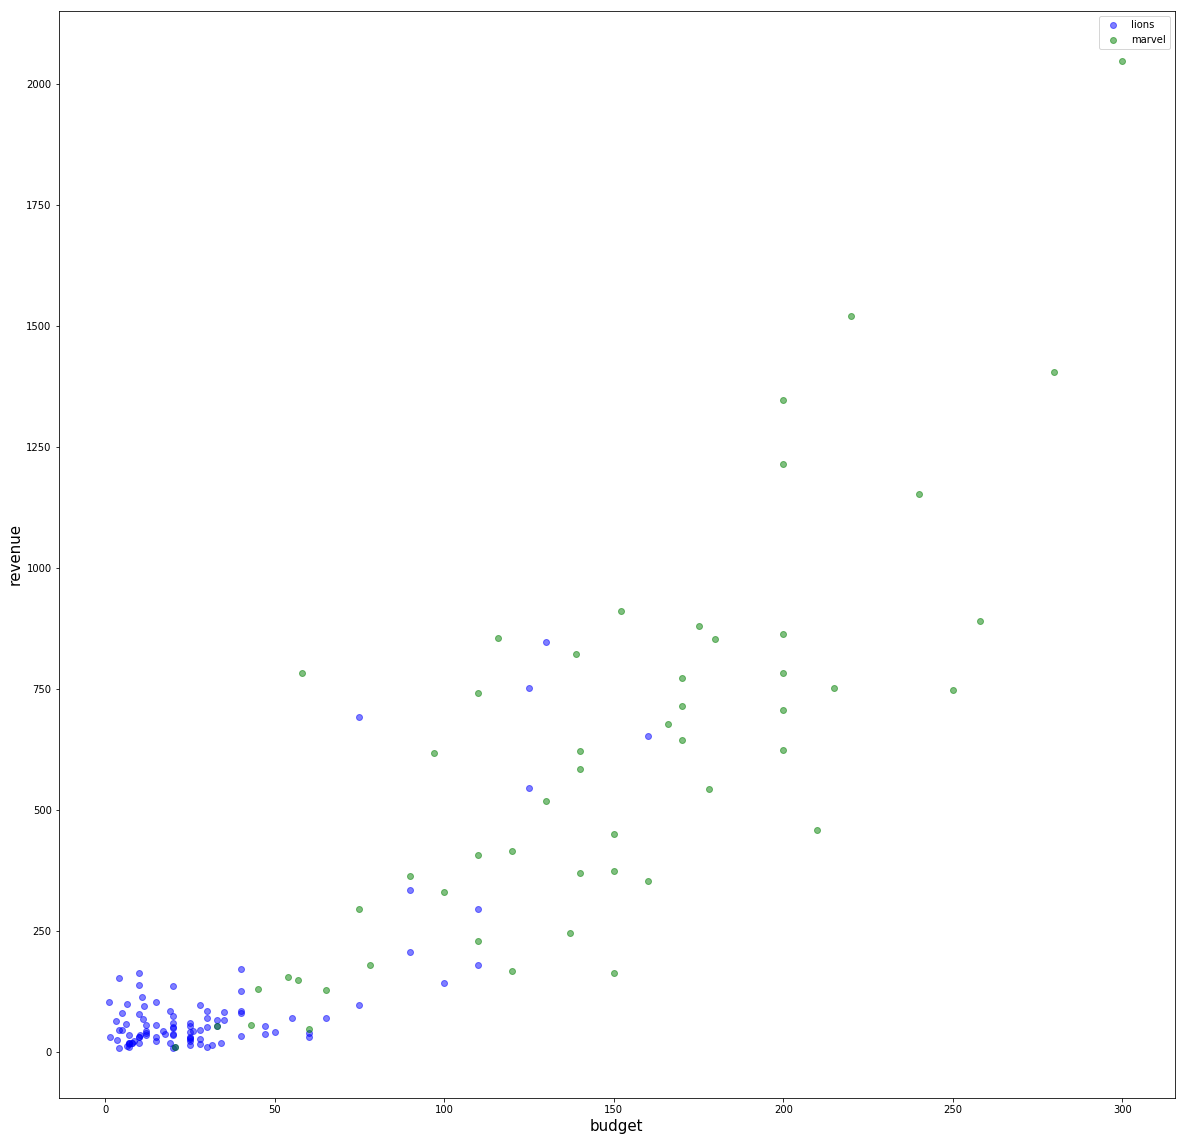

In [358]:
comp_to_map = ['lions','marvel']

from itertools import cycle
cycol = cycle('bgrcmk')

def get_x_vals(company):
    x = df[df[company] == True]['budget']
    return x

def get_y_vals(company):
    y = df[df[company] == True]['revenue']
    return y

def get_z_vals(company):
    z = df[df[company] == True]['multiple']
    return z

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)


for co in comp_to_map:
    ax.scatter(get_x_vals(co), get_y_vals(co), label=co, alpha=0.5, c=next(cycol))
        
ax.set_xlabel('budget', fontsize=15), ax.set_ylabel('revenue', fontsize=15)
#ax.grid(True)
ax.legend()
plt.show()


In [353]:
df.groupby('release_year')['multiple', 'revenue'].aggregate(['count', min, max, 'mean']).sort_values('release_year', ascending=False).head(20)

multiple                                 revenue             \
                count       min         max      mean   count        min   
release_year                                                               
2019                9  0.980214   12.188263  4.176021       9  17.643857   
2018              112  0.306250  262.500000  6.946971     112   9.602624   
2017              114  0.285811   56.670518  4.887885     114   8.574339   
2016              146  0.157009   30.381395  3.793217     146   8.810591   
2015              119  0.253613  426.644100  8.466594     119   8.235661   
2014              133  0.280514   89.174335  5.308987     133  10.076790   
2013              126  0.172542   29.776209  3.576914     126   7.972967   
2012              120  0.351373  101.758490  4.820833     120   8.138788   
2011              136  0.259952   41.140764  3.475160     136   8.000000   
2010              126  0.224234   64.672767  4.286477     126   7.871522   
2009              134  0.255284   33.529412  3.293062     134   7.875862   
2008              132  0.207196   66.912634  3.419447     132   8.049666   
2007              126  0.167137   30.854878  3.204383     126   7.938872   
2006              148  0.165426  101.783310  3.836907     148   8.059140   
2005              132  0.127081   38.231273  3.018871     132   8.342132   
2004              119  0.178069  439.616585  8.267414     119   8.112712   
2003              109  0.230785  420.522723  7.671061     109   7.808524   
2002              121  0.212347   73.748809  3.437680     121   8.493890   
2001              110  0.181292   15.410302  2.808878     110  10.013424   
2000              102  0.164756   14.632620  2.526696     102   8.279017   

                                       
                      max        mean  
release_year                           
2019           910.298835  245.471069  
2018          2046.239637  213.053599  
2017          1332.459537  225.215451  
2016          1153.304495  182.279479  
2015          2068.223624  215.544608  
2014          1091.405097  184.418182  
2013          1274.219009  187.275408  
2012          1519.557910  197.363310  
2011          1342.000000  163.123302  
2010          1066.969703  170.562476  
2009          2787.965087  162.244097  
2008          1004.558444  136.537320  
2007           961.000000  144.276677  
2006          1065.659812  112.968160  
2005           895.921036  115.425327  
2004           919.838758  130.564786  
2003          1118.888979  139.720937  
2002           926.287400  122.333090  
2001           976.475550  121.744086  
2000           546.388105  109.084310

In [354]:
df.groupby('release_year')['revenue'].aggregate(['count', min, max, 'mean']).sort_values('release_year', ascending=False).head(10)

,count,min,max,mean
release_year,,,,
2019,9,17.643857,910.298835,245.471069
2018,112,9.602624,2046.239637,213.053599
2017,114,8.574339,1332.459537,225.215451
2016,146,8.810591,1153.304495,182.279479
2015,119,8.235661,2068.223624,215.544608
2014,133,10.076790,1091.405097,184.418182
2013,126,7.972967,1274.219009,187.275408
2012,120,8.138788,1519.557910,197.363310
2011,136,8.000000,1342.000000,163.123302


In [223]:
df.loc[(df['lions'] == True)].groupby('release_year')['revenue', 'budget'].sum().sort_values('release_year', ascending=False)

,revenue,budget
release_year,,
2017.0,313.877127,140.0
2016.0,894.019708,290.5
2015.0,1032.692278,300.0
2014.0,1029.427365,280.0
2013.0,847.423452,130.0
2012.0,841.653640,145.0
2011.0,167.500053,75.0
2010.0,330.499300,123.0
2009.0,180.363734,25.0


In [224]:
df.loc[(df['lions'] == True)].sort_values('multiple', ascending=False)

,Unnamed: 0,id,imdb_id,title,original_title,release_date,revenue,budget,runtime,tagline,...,columbia,pixar,marvel,warner,paramount,fox,universal,newline,dreamworks,relativity
1441,1441,176.0,tt0387564,Saw,Saw,2004-10-01,103.911669,1.2,103.0,Live or die. Make your choice.,...,False,False,False,False,False,False,False,False,False,False
1017,1017,215.0,tt0432348,Saw II,Saw II,2005-10-28,152.925093,4.0,89.0,Oh Yes... There Will Be Blood.,...,False,False,False,False,False,False,False,False,False,False
1784,1784,1690.0,tt0450278,Hostel,Hostel,2006-01-06,80.578934,4.8,94.0,Welcome To Your Worst Nightmare,...,False,False,False,False,False,False,False,False,False,False
927,927,214.0,tt0489270,Saw III,Saw III,2006-10-27,163.876815,10.0,114.0,Suffering? You Haven't Seen Anything Yet...,...,False,False,False,False,False,False,False,False,False,False
1530,1530,1640.0,tt0375679,Crash,Crash,2004-09-10,98.410061,6.5,112.0,You think you know who you are. You have no idea.,...,False,False,False,False,False,False,False,False,False,False
1112,1112,663.0,tt0890870,Saw IV,Saw IV,2007-10-25,139.352633,10.0,96.0,You think it is over...but the games have just...,...,False,False,False,False,False,False,False,False,False,False
1345,1345,11917.0,tt1132626,Saw V,Saw V,2008-10-23,113.857533,10.8,95.0,You Won't Believe How It Ends,...,False,False,False,False,False,False,False,False,False,False
117,117,70160.0,tt1392170,The Hunger Games,The Hunger Games,2012-03-12,691.210692,75.0,142.0,May The Odds Be Ever In Your Favor.,...,False,False,False,False,False,False,False,False,False,False
1586,1586,291870.0,tt1860213,Dirty Grandpa,Dirty Grandpa,2016-01-21,94.073028,11.5,102.0,This is Jason. He's a little worried about his...,...,False,False,False,False,False,False,False,False,False,False
1835,1835,18781.0,tt0492044,The Haunting in Connecticut,The Haunting in Connecticut,2009-03-27,77.527732,10.0,102.0,Some things cannot be explained.,...,False,False,False,False,False,False,False,False,False,False


In [261]:
list_of_cos = []
var = 'multiple'

lions_dict = {'name': 'lions', 
              'count': df.loc[(df['lions'] == True)]['var'].count(), 
              'mean': df.loc[(df['lions'] == True)]['var'].mean(),
              'median': df.loc[(df['lions'] == True)]['var'].median(),
              'min': df.loc[(df['lions'] == True)]['var'].min(),
              'max': df.loc[(df['lions'] == True)]['var'].max(),
              'std': df.loc[(df['lions'] == True)]['var'].std()
             }
lions_dict
#df_summary = pd.DataFrame({'lion': df.groupby('lions')['multiple'].describe()})

{'name': 'lions',
 'count': 33,
 'mean': 9.16006508238819,
 'median': 4.288497175,
 'min': 1.0946860307692308,
 'max': 86.5930575,
 'std': 15.643633997127521}

In [226]:
df.loc[df['multiple'].idxmax()]

Unnamed: 0                                                            577
id                                                                   2667
imdb_id                                                         tt0185937
title                                             The Blair Witch Project
original_title                                    The Blair Witch Project
release_date                                          1999-07-14 00:00:00
revenue                                                               248
budget                                                               0.06
runtime                                                                81
tagline                   The scariest movie of all time is a true story.
overview                In October of 1994 three student filmmakers di...
production_countries        [{iso_3166_1:US, name:UnitedStatesofAmerica}]
vote_average                                                          6.3
vote_count                            

In [404]:
prod_cos = ['lions', 'disney', 'columbia', 'pixar', 'marvel', 'warner', 'paramount', 'fox', 'universal', 'newline', 'dreamworks', 'relativity']
list_of_cos = []
var = 'multiple'

for pco in prod_cos:
    
    pco_dict = {'name': pco, 
                  'count': df.loc[(df[pco] == True)][var].count(), 
                  'mean': df.loc[(df[pco] == True)][var].mean(),
                  'median': df.loc[(df[pco] == True)][var].median(),
                  'min': df.loc[(df[pco] == True)][var].min(),
                  'max': df.loc[(df[pco] == True)][var].max(),
                  'std': df.loc[(df[pco] == True)][var].std()
                 }
    list_of_cos.append(pco_dict)
    
list_of_cos[0]

{'name': 'lions',
 'count': 97,
 'mean': 5.080357081634828,
 'median': 2.368553125,
 'min': 0.33410510000000004,
 'max': 86.5930575,
 'std': 9.970694612762195}

In [360]:
company_df = pd.DataFrame(list_of_cos)

In [361]:
company_df

,count,max,mean,median,min,name,std
0,97,86.593058,5.080357,2.368553,0.334105,lions,9.970695
1,145,22.991743,3.578983,2.634837,0.259952,disney,3.482423
2,267,26.131792,2.910695,2.236285,0.171834,columbia,2.680330
3,20,12.451801,4.877721,4.387500,1.896721,pixar,2.566462
4,52,13.501724,3.912504,3.617528,0.492165,marvel,2.171028
5,342,20.339480,2.818788,2.083683,0.160914,warner,2.726052
6,252,115.295242,4.125979,2.325671,0.197032,paramount,9.345168
7,325,115.295242,4.478681,2.684266,0.166843,fox,7.682187
8,332,62.882090,4.279463,2.562444,0.231079,universal,5.519200
9,172,426.644100,6.629073,2.764966,0.261315,newline,32.624861


In [362]:
company_df = company_df[['name', 'count', 'mean', 'median', 'std', 'min', 'max']]

In [403]:
company_df

,name,count,mean,median,std,min,max
0,lions,97,5.080357,2.368553,9.970695,0.334105,86.593058
1,disney,145,3.578983,2.634837,3.482423,0.259952,22.991743
2,columbia,267,2.910695,2.236285,2.680330,0.171834,26.131792
3,pixar,20,4.877721,4.387500,2.566462,1.896721,12.451801
4,marvel,52,3.912504,3.617528,2.171028,0.492165,13.501724
5,warner,342,2.818788,2.083683,2.726052,0.160914,20.339480
6,paramount,252,4.125979,2.325671,9.345168,0.197032,115.295242
7,fox,325,4.478681,2.684266,7.682187,0.166843,115.295242
8,universal,332,4.279463,2.562444,5.519200,0.231079,62.882090
9,newline,172,6.629073,2.764966,32.624861,0.261315,426.644100


In [402]:
prod_cos = ['lions', 'disney', 'columbia', 'pixar', 'marvel', 'warner', 'paramount', 'fox', 'universal', 'newline', 'dreamworks', 'relativity']
revenue_list = []
var = 'revenue'

for pco in prod_cos:
    
    pco_dict = {'name': pco, 
                  'count': df.loc[(df[pco] == True)][var].count(), 
                  'mean': df.loc[(df[pco] == True)][var].mean(),
                  'median': df.loc[(df[pco] == True)][var].median(),
                  'min': df.loc[(df[pco] == True)][var].min(),
                  'max': df.loc[(df[pco] == True)][var].max(),
                  'std': df.loc[(df[pco] == True)][var].std()
                 }
    revenue_list.append(pco_dict)
    
revenue_list[0]

{'name': 'lions',
 'count': 97,
 'mean': 95.82703929896913,
 'median': 50.5,
 'min': 8.05914,
 'max': 847.423452,
 'std': 153.24138549781912}

In [365]:
company_revenue = pd.DataFrame(revenue_list)

In [366]:
company_revenue = company_revenue[['name', 'count', 'mean', 'median', 'std', 'min', 'max']]

In [401]:
company_revenue

,name,count,mean,median,std,min,max
0,lions,97,95.827039,50.500000,153.241385,8.059140,847.423452
1,disney,145,286.256495,165.335153,313.712819,10.130000,1346.739107
2,columbia,267,162.723455,113.086475,177.937365,9.450897,1108.561013
3,pixar,20,663.235321,593.269537,258.025578,331.926147,1241.891456
4,marvel,52,598.784373,600.988015,418.836230,10.089373,2046.239637
5,warner,342,195.948364,106.794523,243.392709,7.938872,1519.557910
6,paramount,252,161.556479,94.498537,210.016993,7.808524,1845.034188
7,fox,325,180.298314,101.134059,245.057716,8.009329,2787.965087
8,universal,332,169.117363,99.982664,219.194507,8.266343,1671.713208
9,newline,172,142.090620,81.017788,195.260799,8.000000,1118.888979


In [370]:
prod_cos = ['lions', 'disney', 'columbia', 'pixar', 'marvel', 'warner', 'paramount', 'fox', 'universal', 'newline', 'dreamworks', 'relativity']
budget_list = []
var = 'budget'

for pco in prod_cos:
    
    pco_dict = {'name': pco, 
                  'count': df.loc[(df[pco] == True)][var].count(), 
                  'mean': df.loc[(df[pco] == True)][var].mean(),
                  'median': df.loc[(df[pco] == True)][var].median(),
                  'min': df.loc[(df[pco] == True)][var].min(),
                  'max': df.loc[(df[pco] == True)][var].max(),
                  'std': df.loc[(df[pco] == True)][var].std()
                 }
    budget_list.append(pco_dict)
    
budget_list

[{'name': 'lions',
  'count': 97,
  'mean': 31.00824742268041,
  'median': 20.0,
  'min': 1.2,
  'max': 160.0,
  'std': 32.0912912320172},
 {'name': 'disney',
  'count': 145,
  'mean': 90.16848965517242,
  'median': 65.0,
  'min': 3.0,
  'max': 380.0,
  'std': 73.48555765091206},
 {'name': 'columbia',
  'count': 267,
  'mean': 61.514588014981285,
  'median': 50.0,
  'min': 5.0,
  'max': 258.0,
  'std': 46.48639303722741},
 {'name': 'pixar',
  'count': 20,
  'mean': 152.55,
  'median': 175.0,
  'min': 30.0,
  'max': 200.0,
  'std': 48.744743306329966},
 {'name': 'marvel',
  'count': 52,
  'mean': 144.83653846153845,
  'median': 145.0,
  'min': 20.5,
  'max': 300.0,
  'std': 66.03962871134138},
 {'name': 'warner',
  'count': 342,
  'mean': 71.10730995029239,
  'median': 50.0,
  'min': 2.7,
  'max': 500.0,
  'std': 58.95808373245546},
 {'name': 'paramount',
  'count': 252,
  'mean': 56.556567123015874,
  'median': 45.0,
  'min': 0.3,
  'max': 217.0,
  'std': 46.25794050133296},
 {'name': 

In [371]:
company_budget = pd.DataFrame(budget_list)

In [372]:
company_budget = company_budget[['name', 'count', 'mean', 'median', 'std', 'min', 'max']]

In [400]:
company_budget

,name,count,mean,median,std,min,max
0,lions,97,31.008247,20.0,32.091291,1.2,160.0
1,disney,145,90.168490,65.0,73.485558,3.0,380.0
2,columbia,267,61.514588,50.0,46.486393,5.0,258.0
3,pixar,20,152.550000,175.0,48.744743,30.0,200.0
4,marvel,52,144.836538,145.0,66.039629,20.5,300.0
5,warner,342,71.107310,50.0,58.958084,2.7,500.0
6,paramount,252,56.556567,45.0,46.257941,0.3,217.0
7,fox,325,51.354292,38.0,43.691085,0.4,250.0
8,universal,332,51.951001,40.0,43.281882,1.0,250.0
9,newline,172,39.812721,30.0,40.966327,0.1,250.0


In [463]:
#x = company_budget.loc[company_budget['name'] == 'pixar']['mean'].
x_vals = []
y_vals = []
z_vals = []

for i in range(len(prod_cos)):
    x_vals.append(company_budget.iloc[i]['mean'])

for i in range(len(prod_cos)):
    y_vals.append(company_revenue.iloc[i]['mean'])
    
for i in range(len(prod_cos)):
    z_vals.append((company_df.iloc[i]['mean']) * 15)

In [471]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='maks_p', api_key='PRffKJ13imRF172KyXLB')

trace0 = go.Scatter(
    x = x_vals,
    y = y_vals,
    mode='markers',
    name = "Production Companies",
    text = ['lions', 'disney', 'columbia', 'pixar', 'marvel', 'warner', 'paramount', 'fox', 'universal', 'newline', 'dreamworks', 'relativity'],
    marker=dict(
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',  'rgb(44, 160, 101)', 'rgb(255, 65, 54)', 'rgb(93, 164, 214)', 'rgb(255, 144, 14)',  'rgb(44, 160, 101)', 'rgb(255, 65, 54)', 'rgb(93, 164, 214)', 'rgb(255, 144, 14)',  'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        size = z_vals,

    )
)
data = [trace0]
layout = go.Layout(
    title='Budget vs. Revenue w/ Multiple',
    xaxis=dict(
        title='Budget',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Revenue',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-chart-basic')


/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

